<a href="https://colab.research.google.com/github/MariaFernanda33/IA_USTA/blob/main/Taller1_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [1]:
!pip install scikit-fuzzy #Instalar libreria en phyton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.1 MB/s eta 0:00:00


# 2. Importar librerias

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

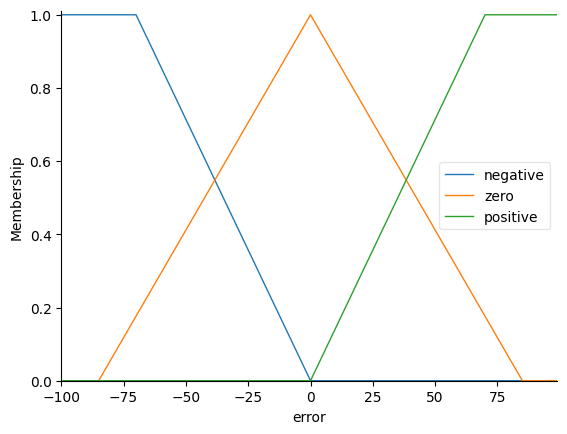

In [307]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-70,0])
error['zero'] = fuzz.trimf(error.universe,[-85,0,85])
error['positive'] = fuzz.trapmf(error.universe,[0,70,100,100])
error.view()

Para los antecedentes, se cambio el rango en el que la funcion de membresia trapesoidal tanto la negativa como la positiva empiezan a cambiar, por otro lado se pudo evidenciar que a menor area que el zero abarque de las demas funciones, el error estará mas presente, siendo que si se varia el rango de la triangular a uno menor , la accion de control frente al error, solo se realizara un rangos del error cercanos a cero.

Dicho lo anterior, la trinagular ha abarcado la mayor parte del cambio de las demas funciones de menbresia esto a fin de minimizar el error.


### **PASO 2. Variable de salida**

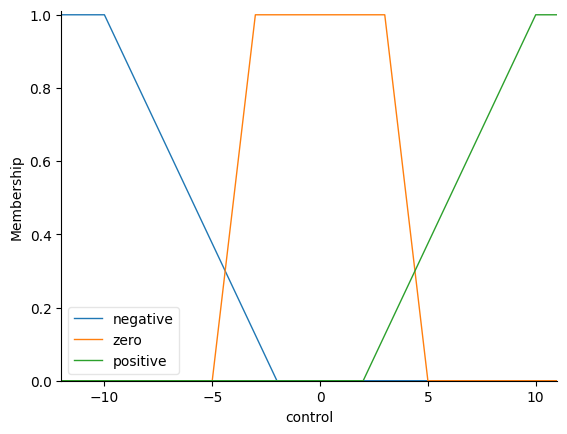

In [308]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,-2])
control['zero'] = fuzz.trapmf(control.universe,[-5,-3,3,5]) #curva
control['positive'] = fuzz.trapmf(control.universe,[2,10,12,12])
control.view()

Las variables de salida por otro lado, se modifico el rango de las funciones de menbresia, entre mas cerca esten de una inteseccion la positiva y negativa, mas lineal sera el comportamiento de la grafica de error, por otro lado para cotribuir a esa linealidad, la funcion trapezoidal del cero ha de abarcar poco del rango de las otras dos funciones.


### **PASO 3. Inferencia**

In [309]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [310]:
##MOTOR DE INFERENCIA  entrega una variable defuzificada
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 2.551991475176884
Salida defuzzificada  redondeada= 2.55


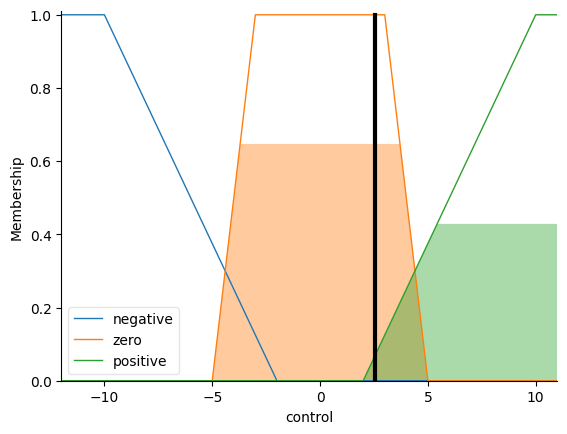

In [321]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [322]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [323]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

In [324]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acción de control [V]')

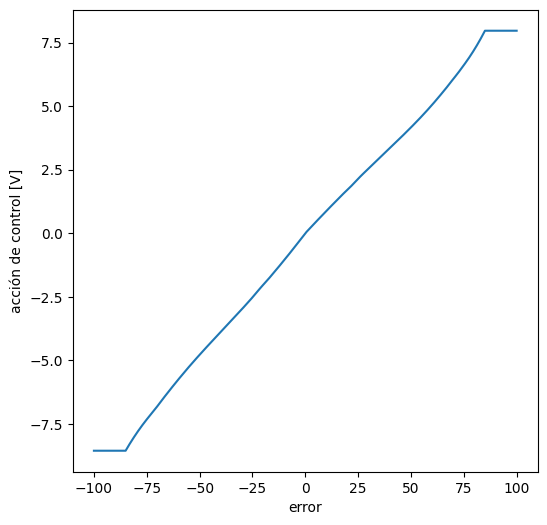

In [325]:
fig = plt.figure(figsize=(6, 6))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')



La accion de control frente al error, fue posible de mejorar, se presenta unas una pequeñas curvaturas, y no esta en el extremo , ya que los rangos que afectan a esto, no se llevaron al los valores mas altos que podian llevarse, es decir la funcion triangular del zero solollega a 85.
